# Multi-computation with boundary field change

In [ ]:
from trustutils import run

run.introduction("Pierre Ledac")
run.description("**Champ_front_parametrique** boundary field for chaining different scenarios in a single *datafile*. \
Two stationary then one transitory computation are run and compared to one simulation running the three computations. \
Each computation is run into a **dedicated directory** named calcul# with **time reset to 0**")
run.TRUST_parameters("1.9.4")

## Introduction 
 Validation made by : Pierre Ledac



 Report generated 07/05/2024

### Description 
**Champ_front_parametrique** boundary field for chaining different scenarios in a single *datafile*. Two stationary then one transitory computation are run and compared to one simulation running the three computations. Each computation is run into a **dedicated directory** named calcul# with **time reset to 0**

### TRUST parameters 
 * Version TRUST: 1.9.4
 * Binary used: /export/home/catA/pl254994/trust/next_portable/exec/TRUST_mpi_opt (built in directory /export/home/catA/pl254994/trust/next_portable/Validation/Rapports_automatiques/Verification/Champs/Champ_front_parametrique/build)

In [ ]:
from trustutils import run 
import os
jdd="cfp"
cases=[
    (jdd, "champ_front_parametrique", "champ_front_parametrique { fichier champ_front.txt }"),
    ("calcul1", "stationary 1", "champ_front_uniforme 2 1.0 0.0"),
    ("calcul2", "stationary 2", "champ_front_uniforme 2 2.0 0.0"),
    ("calcul3", "transient", "champ_front_tabule 2 { 3   0.0 1.0 2.0   2.0 0.0  1.99 0.0  1.0 0.0 }")
]
#    
run.reset()
run.initCaseSuite()
run.executeCommand("echo { > champ_front.txt")
separateur=""
# Create test case:
for case,label,syntax in cases:
    if label=="champ_front_parametrique":
       rep="."
    else:
       rep=case
       # Build champ_front.txt file containing the list of boundary fields:
       run.executeCommand("echo -e %s %s >> champ_front.txt" % (separateur, syntax), verbose=False)
       separateur=","
    run.executeCommand("rep=%s;case=%s;mkdir -p $rep;cp base.data $rep/$case.data;cp verifie $rep/post_run" % (rep,case), verbose=False)
    cas = run.addCase(rep ,"%s.data" % case) 
    cas.substitute("_champ_",syntax)

run.executeCommand("echo } >> champ_front.txt")
run.printCases()
run.runCases()

### Test cases 
* ./cfp.data 
* calcul1/calcul1.data 
* calcul2/calcul2.data 
* calcul3/calcul3.data 


Running ...
  => A total of 4 cases were (successfully) run in 3.0s.


## Check results
### The computation (single or multi) should converge to same value

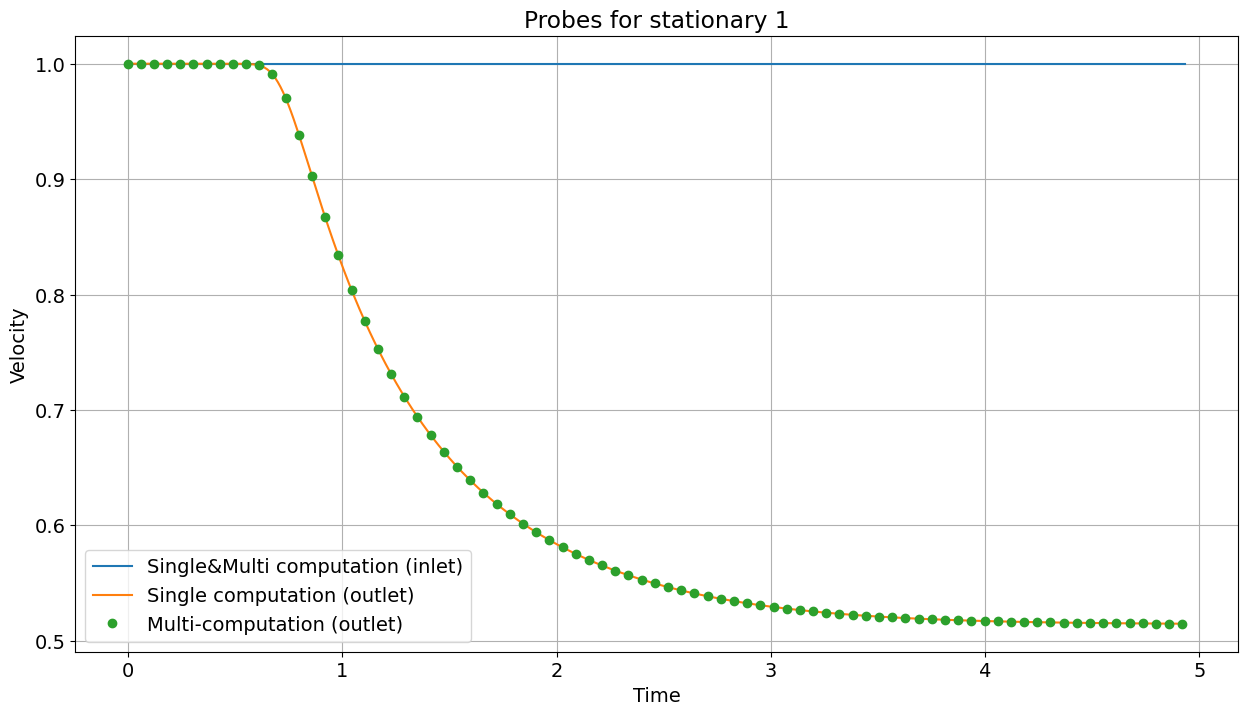

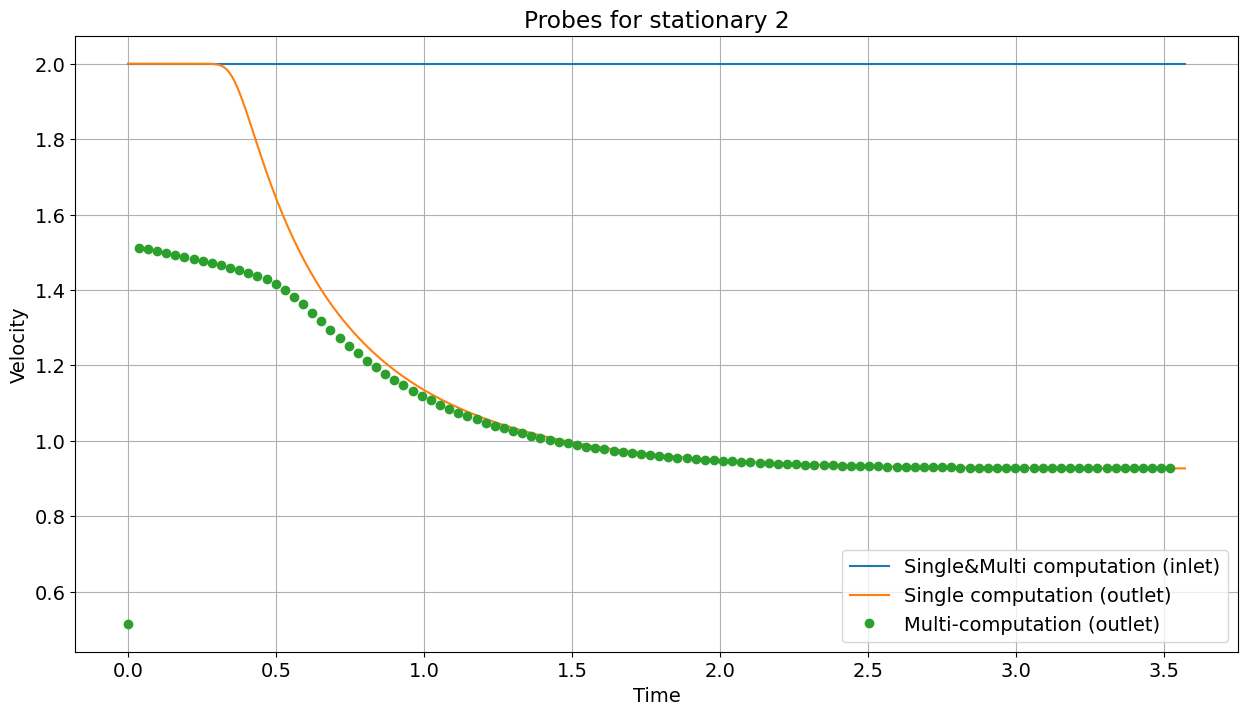

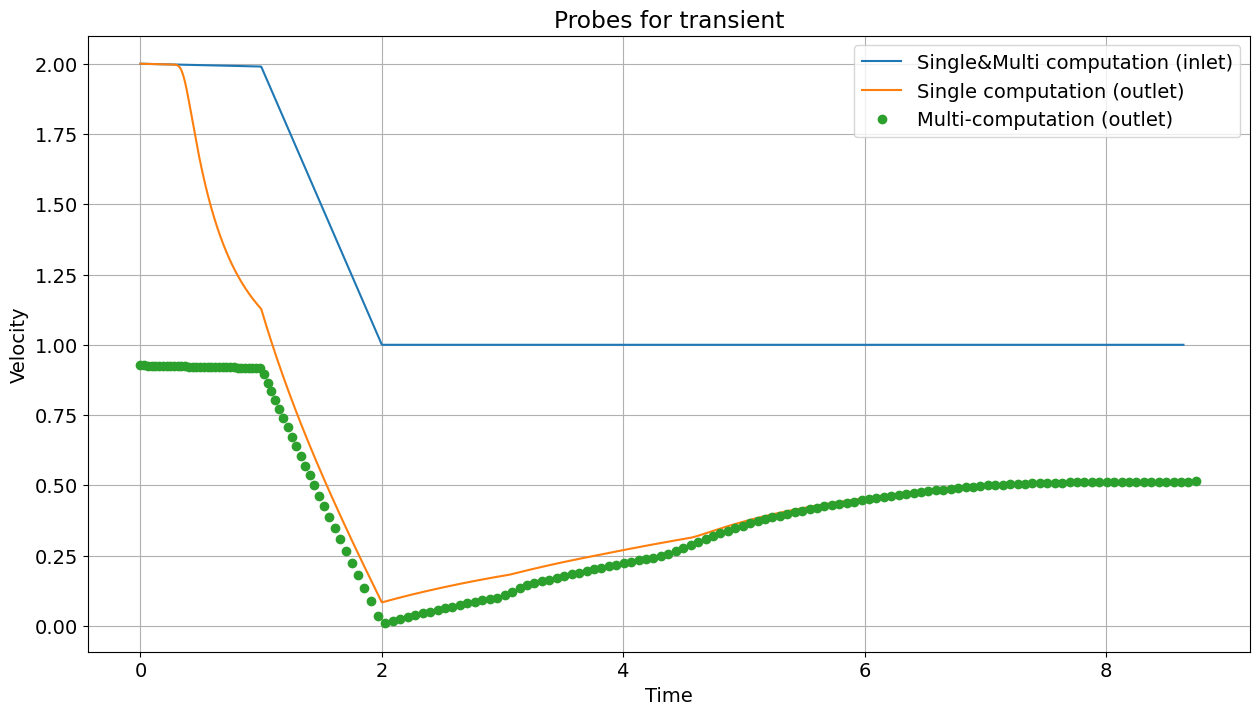

In [ ]:
from trustutils import plot 
import numpy as np
import matplotlib.pyplot as plt 
jdd="cfp"
for case,label,syntax in cases:
    if label!="champ_front_parametrique":
        a=plot.Graph("Probes for %s" % label,size=[15,8])
        a.addPoint("%s/%s_IN.son"   % (case,case), marker='-', label="Single&Multi computation (inlet)" )
        a.addPoint("%s/%s_OUT.son"  % (case,case), marker='-', label="Single computation (outlet)")
        a.addPoint("%s/%s_OUT.son"  % (case,jdd) , marker='o', markevery=5, label="Multi-computation (outlet)")
        a.label("Time","Velocity")